<a href="https://colab.research.google.com/github/donlee4u/ML_Class/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression -- 분류(Classification)

## Odds function

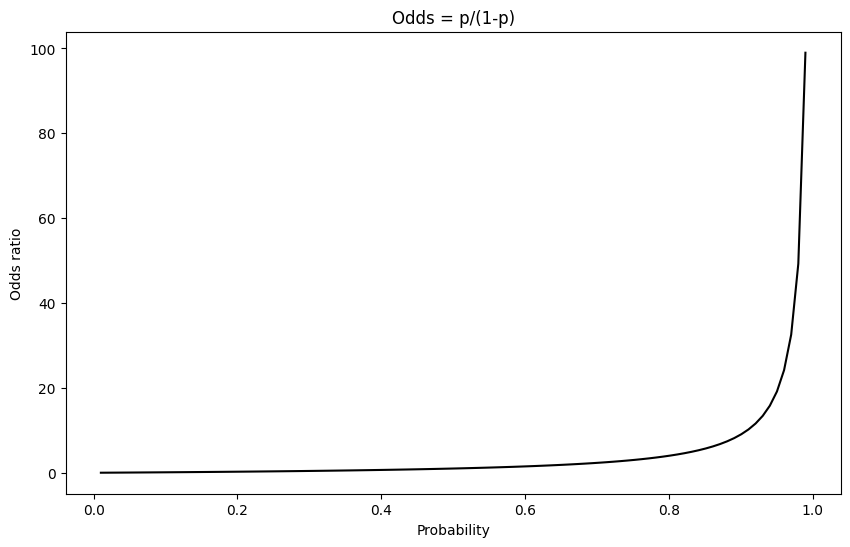

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)

# 오즈 함수 정의
odds = p / (1-p)

# 오즈 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, odds, color='k')
plt.xlabel('Probability')
plt.ylabel('Odds ratio')
plt.title('Odds = p/(1-p)')
plt.show()

## Logit function

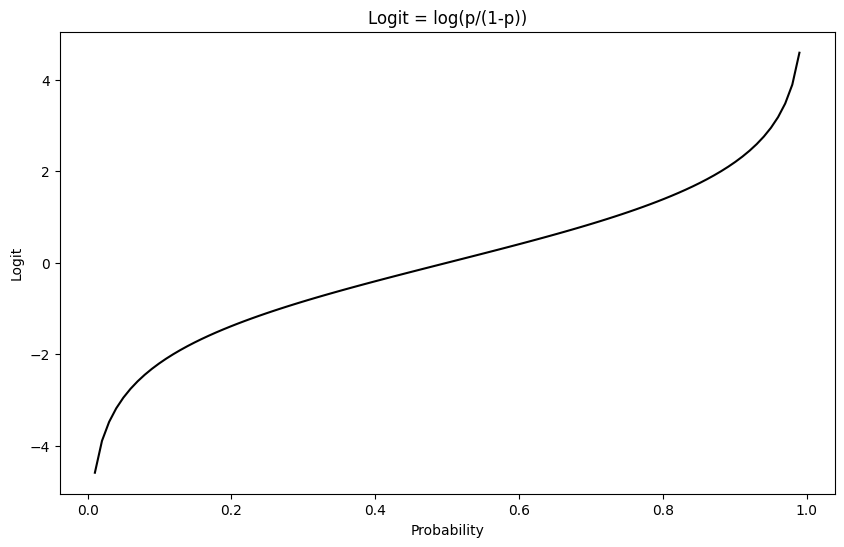

In [ ]:
p = np.linspace(0.01, 0.99, 100)

# 로짓(Logit) 함수 정의
logit = np.log(p / (1 - p))

# 로짓 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, logit, color='k')
plt.xlabel('Probability')
plt.ylabel('Logit')
plt.title('Logit = log(p/(1-p))')
plt.show()

##  Sigmoid function

$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma \left(\omega^T x \right) = \frac{1}{1+e^{-\omega^T x}}$$

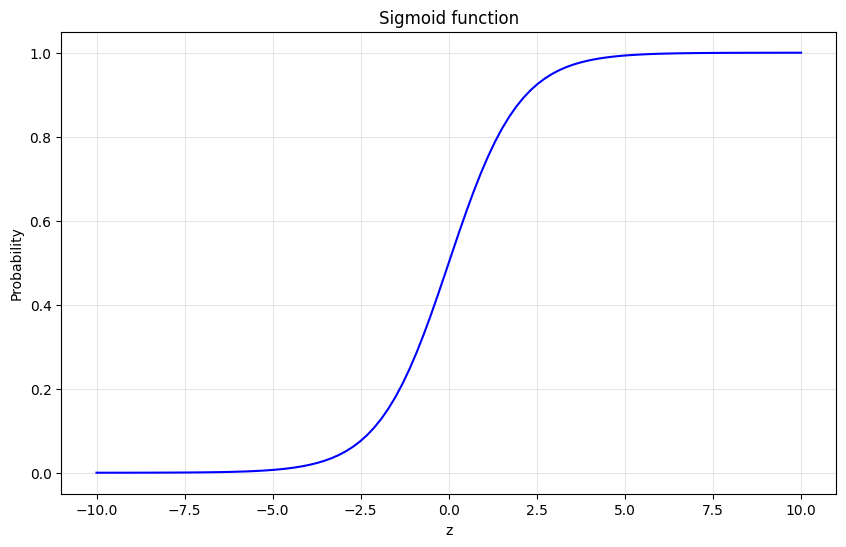

In [ ]:
z = np.linspace(-10, 10, 100)

# 시그모이드 함수 정의
sigmoid = 1 / (1 + np.exp(-z))

# 시그모이드 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.title('Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

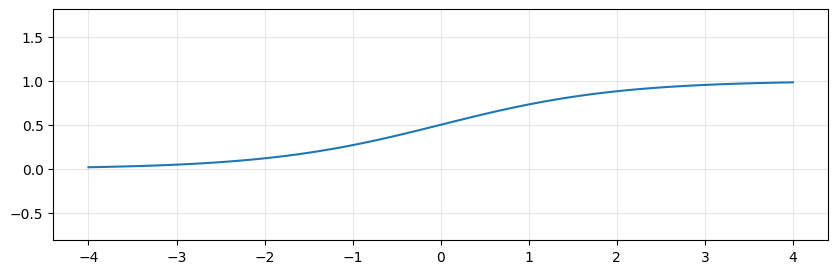

In [ ]:
# Sigmoid function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize = (10, 3))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

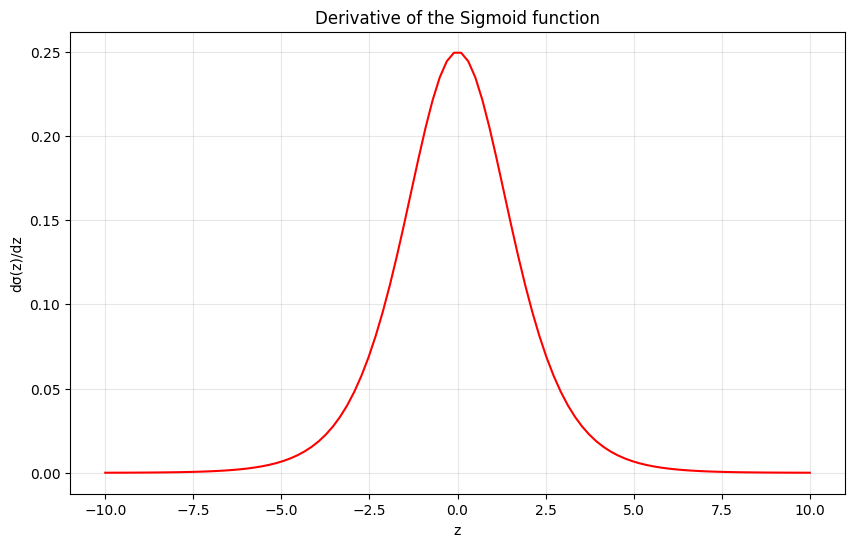

In [ ]:
# 시그모이드 미분 함수 정의
def sigmoid_diff(z):
    sigmoid =  1 / (1 + np.exp(-z))
    return sigmoid * (1 - sigmoid)

z = np.linspace(-10, 10, 100)

# 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_diff(z), color='r')
plt.xlabel('z')
plt.ylabel('dσ(z)/dz')
plt.title('Derivative of the Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

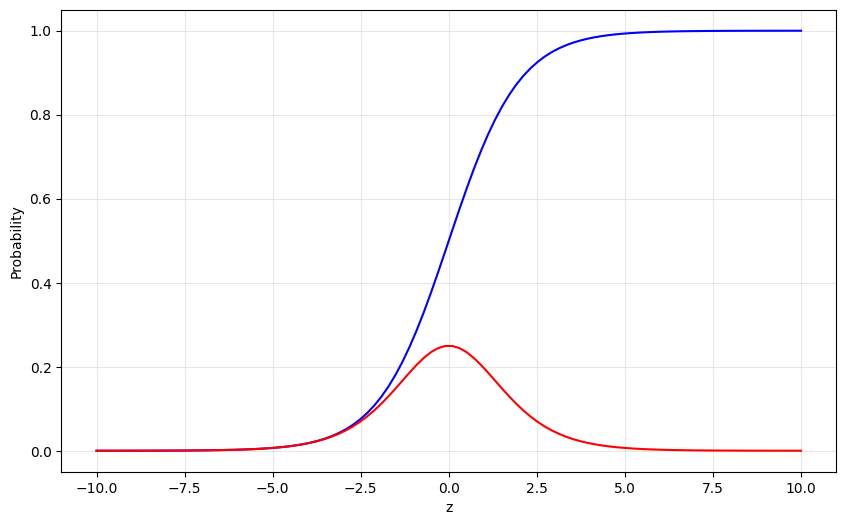

In [ ]:
# 시그모이드 함수와 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid(alpha = 0.3)
plt.plot(z, sigmoid_diff(z), color='r')
plt.show()

<br>**예측함수(Hypothesis function)**
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>

**1개의 학습 데이터 $(x,y)$ 에 대한 확률**
<br>
$$
\begin{align*}
1이\ 나올 \ 확률 :   P\left(y = +1 \mid x\,;\omega\right) &= h_{\omega}(x) = \sigma \left(\omega^T x \right)\\
0이\ 나올 \ 확률 :  P\left(y = 0 \mid x\,;\omega\right) &=  1 - h_{\omega}(x) = 1- \sigma \left(\omega^T x \right)
\end{align*}
$$

<br>

**1이 나올 확률 ($y = 1$)과 0이 나올 확률 ($y = 0$)의 곱의 확률**
<br>

$$P\left(y \mid x\,;\omega\right) = \left(h_{\omega}(x) \right)^y \left(1 - h_{\omega}(x)\right)^{1-y}$$

<br>

**$m$개의 학습 데이터 $(x,y)$ 에 대한 파라미터의 우도함수(likelihood function)**
<br>

$$
\begin{align*}
\mathscr{L}(\omega) &= P\left(y^{(1)}, \cdots, y^{(m)} \mid x^{(1)}, \cdots, x^{(m)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}P\left(y^{(i)} \mid x^{(i)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}\left(h_{\omega}\left(x^{(i)}\right) \right)^{y^{(i)}} \left(1 - h_{\omega}\left(x^{(i)}\right)\right)^{1-y^{(i)}} \qquad \left(\sim \prod_i \lvert h_i \rvert \right)
\end{align*}
$$

<br>

**로그 우도함수(Log likelihood function)**
<br>

$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

<br>

**교차 엔트로피 오차(Cross Entropy error)**
<br>

$$\ error(\omega) = \ -log \mathscr{L}(\omega) = -\sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

**최적의 파라미터**
<br>

$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$

<br>

## 학습 데이터 생성

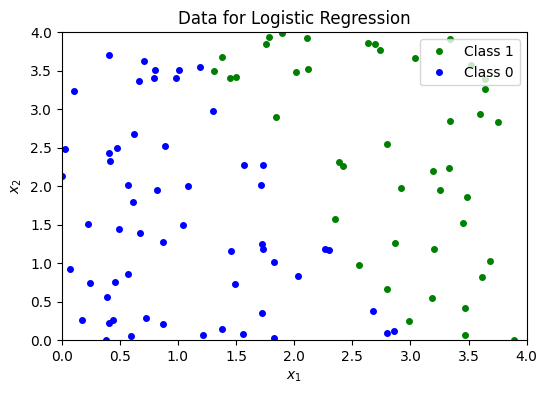

In [ ]:
# 학습 데이터 생성

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5    # ([true],...[false]....])

C1 = np.where(y == True)[0]   # y가 true인 인덱스 값을 return
C0 = np.where(y == False)[0]  # y가 false인 인덱스 값을 return

y = np.empty([m,1])
y[C1] = 1   # Class 1
y[C0] = 0   # Class 0

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.title('Data for Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using CVXPY
$$
\begin{align*}
p &= \frac{1}{1+e^{-\omega^T x}} = \frac{e^{\omega^T x}}{e^{\omega^T x} + 1}\\
1-p &= \frac{1}{e^{\omega^T x} + 1}
\end{align*}
$$

<br>

학습 데이터를 재배열
- 데이터 $x_1, \cdots, x_q$  ----->   $y = +1$을 출력
- 데이터 $x_{q+1}, \cdots, x_m$ ----> $y=0$을 출력

<br>
우도함수(The likelihood function)
<br>

$$\mathscr{L} = \prod\limits_{i=1}^{q}{p_i}\prod\limits_{i=q+1}^{m}{(1-p_i)}$$

<br>
로그우도함수(The log likelihood function)

<br>

$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*}
$$

<br>

Since $\ell$ is a concave function of $\omega$, the logistic regression problem can be solved as a convex optimization problem

<br>
$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$
$$\hat{\omega} = -\arg\min_{\omega} \ell(\omega)$$
<br>

<br>
$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$
<br><br>
$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\ \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\ \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$
<br>

Refer to [cvxpy functions](http://www.cvxpy.org/en/latest/tutorial/functions/)

- scalar function: `cvx.sum(x)` = $\sum_{ij} x_{ij}$

- elementwise function: `cvx.logistic(x)` = $\log \left(1+e^{x} \right)$

<br>

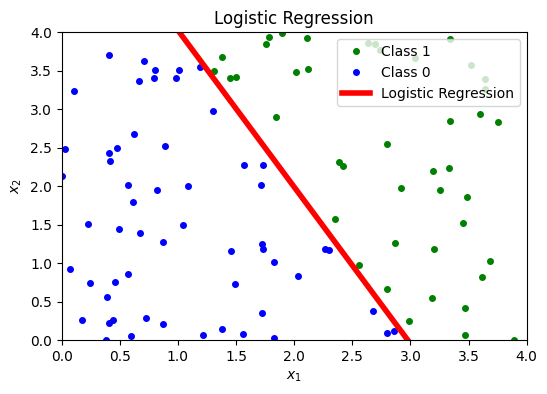

In [ ]:
import cvxpy as cvx

w = cvx.Variable([3, 1])

obj = cvx.Maximize(y.T@X@w - cvx.sum(cvx.logistic(X@w)))
#obj = cvx.Minimize(-y.T@X@w + cvx.sum(cvx.logistic(X@w)))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Gradient Descent

<br>

<br>
예측함수(Hypothesis function)
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>
로그 우도함수(The log likelihood function)

<br>
$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$


<br>
로그우도함수(The log likelihood function)에 대한 parameters $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \vdots \\ \frac{\partial \ell(\omega)}{\partial \omega_n}
\end{bmatrix}$$

<br>
한개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분
$$
\begin{align*}
\frac{\partial}{\partial \omega} \left[ y \log (\sigma) + (1-y) \log (1-\sigma)\right] & = y\frac{\sigma'}{\sigma} + (1-y)\frac{-\sigma'}{1-\sigma}\\
& = \left(\frac{y}{\sigma}-\frac{1-y}{1-\sigma} \right)\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma (1-\sigma)x\\
& = (y-\sigma)x
\end{align*}
$$

m개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \sum_{i=1}^{m} \left(y^{(i)}-h_{\omega} \left(x^{(i)} \right) \right) x_{j}^{(i)} \quad \stackrel{\text{vector 형태}}{=====>} \quad \left(y-h_{\omega}(x)\right)^T x_{j} = x_{j}^T \left(y-h_{\omega}(x)\right) $$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

<br>

$$\nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_0} \\ \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \frac{\partial \ell(\omega)}{\partial \omega_2}
\end{bmatrix} = X^T \left(y-h_{\omega}(x)\right) = X^T \left(y-\sigma(X \omega)\right) $$


<br>
경사하강(Gradient Descent) 업데이트 식
$$\omega \leftarrow \omega - \eta \left( - \nabla \ell(\omega)\right)$$

<br>

In [ ]:
# 예측함수(Hypothesis function) 정의
def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [ ]:
w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df = -X.T*(y - h(X,w))
    w = w - alpha*df

print(w)

[[-33.34026914]
 [ 11.08448042]
 [  5.58087561]]


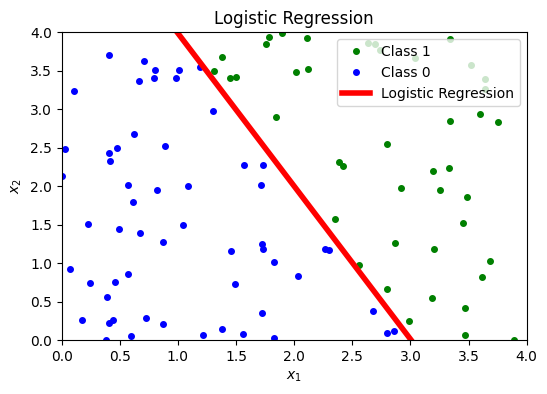

In [ ]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Scikit-Learn

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

In [ ]:
X = X[:, 1:3]

X.shape

(100, 2)

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
#clf.fit(X, np.ravel(y))
clf.fit(np.asarray(X), np.ravel(y))

LogisticRegression()

In [ ]:
clf.coef_

array([[3.09061408, 1.48367408]])

In [ ]:
clf.intercept_

array([-9.25395148])

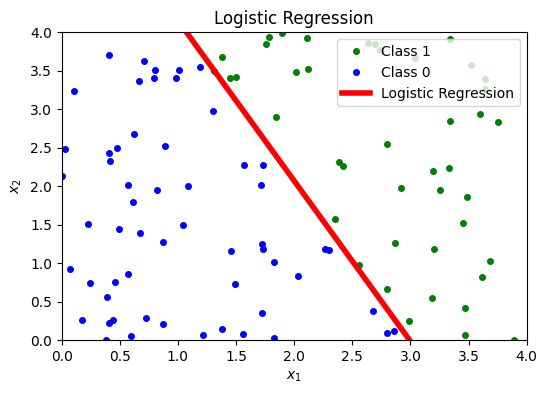

In [ ]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X[C1,0], X[C1,1], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,0], X[C0,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br><br>

# <실습> DIGIT(MNIST) 데이터 분류

- 손글씨로 쓴 0, 1 데이터의 Feature를 추출(Extracting)하는 전처리(Preprocesssing)를 거쳐 Logistic Regression으로 분류하는 실습


<br>
<center>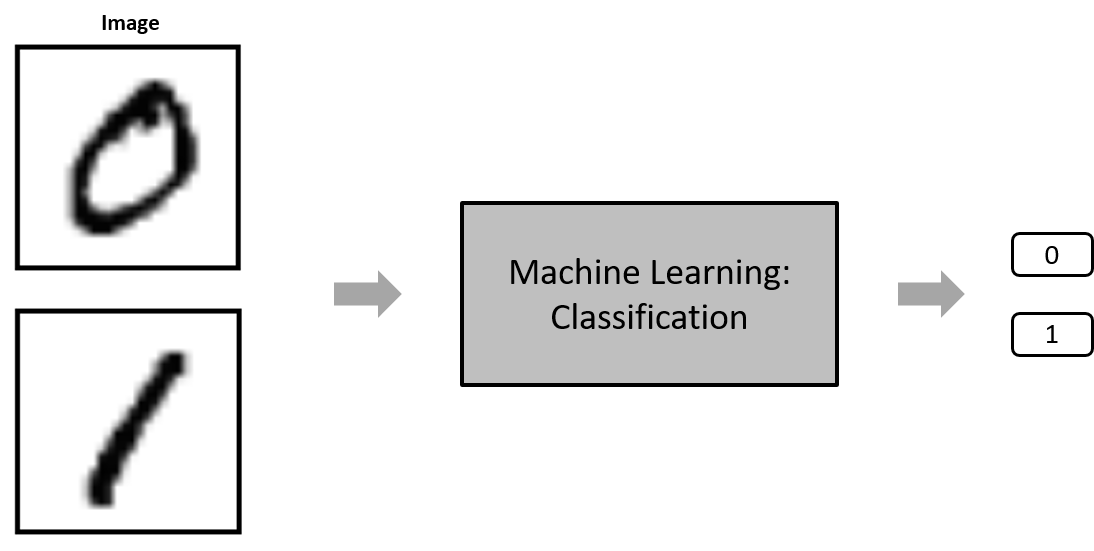</center>
<br>



__Step 1. Load the data__

<br>

|Data | Data dexcription |
|---|---|
|0|1000 images (28×28 pixels) of handwritten digit 0 |
|1|1000 images (28×28 pixels) of handwritten digit 1 |

<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

from six.moves import cPickle  # for data loading

data = cPickle.load(open('/content/drive/MyDrive/Machine Learning실습/binary_data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']


In [ ]:
data1.shape

(1000, 28, 28)

In [ ]:
data1[0].shape

(28, 28)

In [ ]:
data0.shape

(1000, 28, 28)

In [ ]:
data0[0].shape

(28, 28)

In [ ]:
data0[0]
# data1[0]*1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
plt.imshow(data0[0], 'gray')

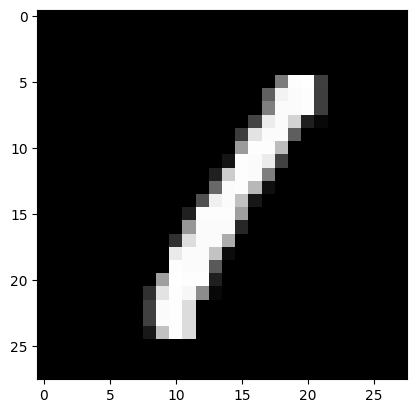

In [ ]:
plt.imshow(data1[0], 'gray')

In [ ]:
plt.imshow(data0[np.random.randint(100)], 'gray') # 1~100 사이의 data0 (0 값)을 가져옴

In [ ]:
plt.figure(figsize = (12, 8))
plt.subplot(2,4,1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,2), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,3), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,4), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,5), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,6), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,7), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,8), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1), plt.imshow(data0[np.random.randint(1000)], 'gray')
plt.subplot(1,2,2), plt.imshow(data1[np.random.randint(1000)], 'gray')
plt.show()

<br>

**Step 2. 특징 추출(Extract features)**
<br>
   입력 데이터로부터 독립적인 특징 요소들을 추출
<br>

$$\phi(x) = \begin{bmatrix} \ \text{feature1}\\ \text{feature2} \end{bmatrix} $$

- Feature 2 : 이미지 전체의 모든 픽셀(Pixel)에 대한 전체 평균
<br>

In [6]:
np.mean(data0, axis=(1,2)).shape

(1000,)

In [7]:
np.mean(data1, axis=(1,2)).reshape(-1,1).shape

(1000, 1)


- Feature 1 : 이미지 센터에서 일정한 범위(img[12:16, 12:16])의 픽셀(Pixel)들의 전체 평균

<br>

In [9]:
np.mean(data0[:,12:16, 12:16], axis=(1,2)).shape

(1000,)

In [10]:
np.mean(data1[:,12:16, 12:16], axis=(1,2)).shape

(1000,)


- Digit 0의 Feature 1(부분평균) + Feature 2(전체평균)


In [ ]:
X0 = np.hstack([np.mean(data0[:,12:16, 12:16], axis=(1,2)).reshape(-1,1),
                np.mean(data0, axis=(1,2)).reshape(-1,1)])

In [ ]:
X0.shape

(1000, 2)

- Digit 1의 Feature 1(부분평균) + Feature 2(전체평균)

In [ ]:
X1 = np.hstack([np.mean(data1[:,12:16, 12:16], axis=(1,2)).reshape(-1,1),
                np.mean(data1, axis=(1,2)).reshape(-1,1)])

In [ ]:
X1.shape

(1000, 2)

- Include the ones as the bias term.
<br>
$$\phi(x) = \begin{bmatrix} 1 \\ \text{feature1}\\ \text{feature2} \end{bmatrix} \quad \implies \quad X \; (\text{or } \Phi) = \begin{bmatrix} \phi_1^T\\ \vdots \\ \phi_{1000}^T \\ \phi_{1001}^T \\ \vdots \\ \phi_{2000}^T \end{bmatrix}$$
<br>
You should end up with a $2000\times3$ input matrix with the first $1000$ rows correspond to all of the `data0` and the second 1000 rows correspond to all of the given `data1`. This matrix is matrix $X$ (or $\Phi$) which we learned in a class.
<br>

In [ ]:
X = np.vstack([X1, X0])
X.shape

(2000, 2)

In [ ]:
Y = np.vstack([np.ones([1000,1]), np.zeros([1000,1])])
Y.shape

(2000, 1)

<br>

__Step 3. Plot the features of data__

<br>


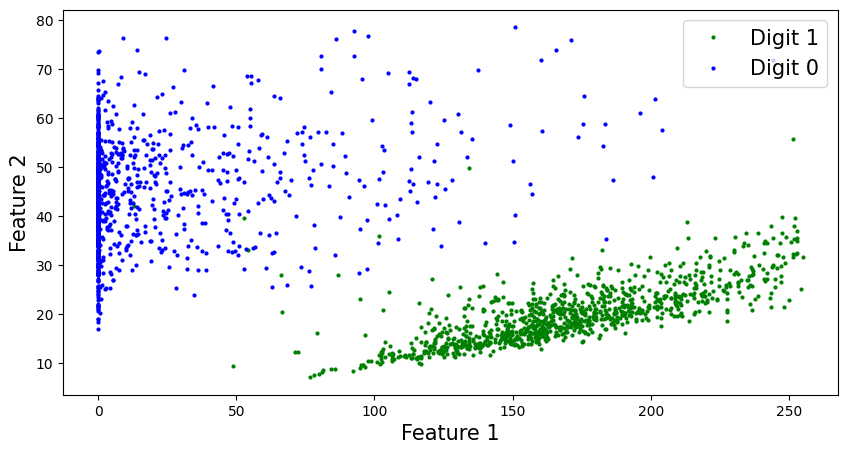

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(X1[:,0], X1[:,1], 'go', markersize = 2, label='Digit 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 2, label='Digit 0')
plt.legend(fontsize = 15)
plt.xlabel(r'Feature 1', fontsize = 15)
plt.ylabel(r'Feature 2', fontsize = 15)
plt.show()

<br>

__Step 4. Logistic Regression 학습__

<br>

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X, np.ravel(Y))

LogisticRegression()

In [ ]:
clf.coef_

array([[ 0.05480823, -0.31100703]])

In [ ]:
clf.intercept_

array([3.53572089])


<br>

- 파라미터 w 값 계산 및 분류경계선(Decision boundry) plot

<br>

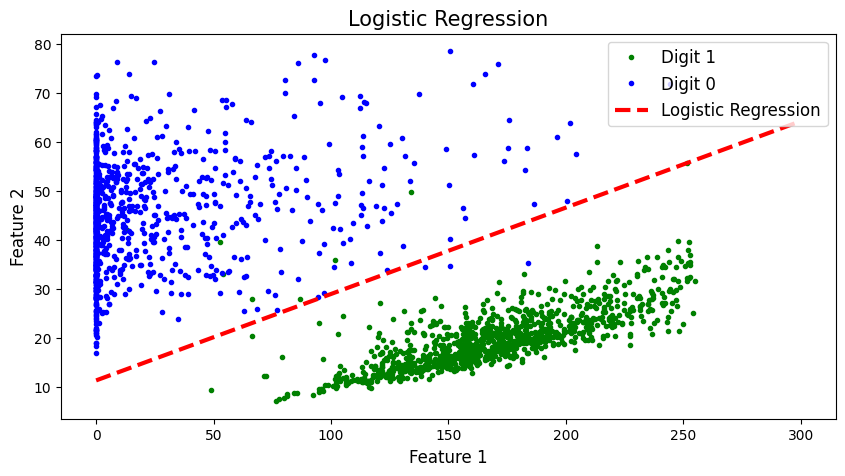

In [ ]:
w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

xp = np.linspace(0,300,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))

plt.plot(X1[:,0], X1[:,1], 'go', markersize = 3, label='Digit 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 3, label='Digit 0')
plt.plot(xp, yp, 'r--', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.legend(fontsize = 12)
plt.xlabel(r'Feature 1', fontsize = 12)
plt.ylabel(r'Feature 2', fontsize = 12)
plt.show()


<br>

__Step 5. New data prediction__

<br>

In [ ]:
test = data0[0]
f_test =  np.hstack([np.mean(test[12:16, 12:16]), np.mean(test_x)]).reshape(1,-1)
f_test.shape

(1, 2)

In [ ]:
result = clf.predict(feature_x)
print(result)

[0.]
